# Crossmodal Capture Study Exploration & Figures

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scipy.stats as stats
import statistics
# import researchpy as rp
# import statsmodels.api as sm
import seaborn as sns
import os
# from glob import glob
# from scipy.stats import iqr
# import scikit_posthocs as sp
# from functools import reduce

In [2]:
# change current working directory
os.chdir(os.path.dirname(os.path.abspath('/Users/sheaduarte/Desktop/School/PSC290python/final/AnalysisHelper.py')))

In [3]:
import AnalysisHelper as ah
from AnalysisHelper import EyeTrackingHelper

In [4]:
#Import data
MSDall = pd.read_csv('/Users/sheaduarte/Desktop/School/PSC290python/final/duarte/data/interim/MSDall.csv')
MSD = pd.read_csv('/Users/sheaduarte/Desktop/School/PSC290python/final/duarte/data/processed/MSD.csv')

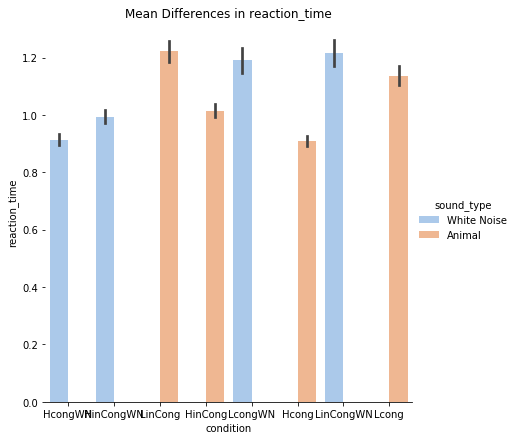

In [18]:
rtG = ah.bar_graph(df = MSD, x = 'condition', y='reaction_time', z= 'sound_type', output_directory = '/Users/sheaduarte/Desktop/School/PSC290python/final/duarte/reports/figures/', custom_scheme = 'pastel')

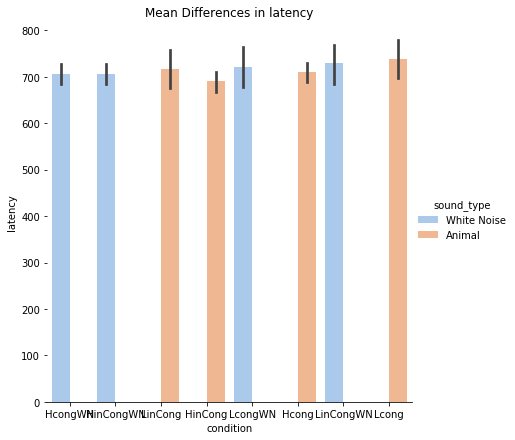

In [22]:
latencyG =  ah.bar_graph(df = MSD, x = 'condition', y='latency', z= 'sound_type', output_directory = '/Users/sheaduarte/Desktop/School/PSC290python/final/duarte/reports/figures/', custom_scheme = 'pastel')

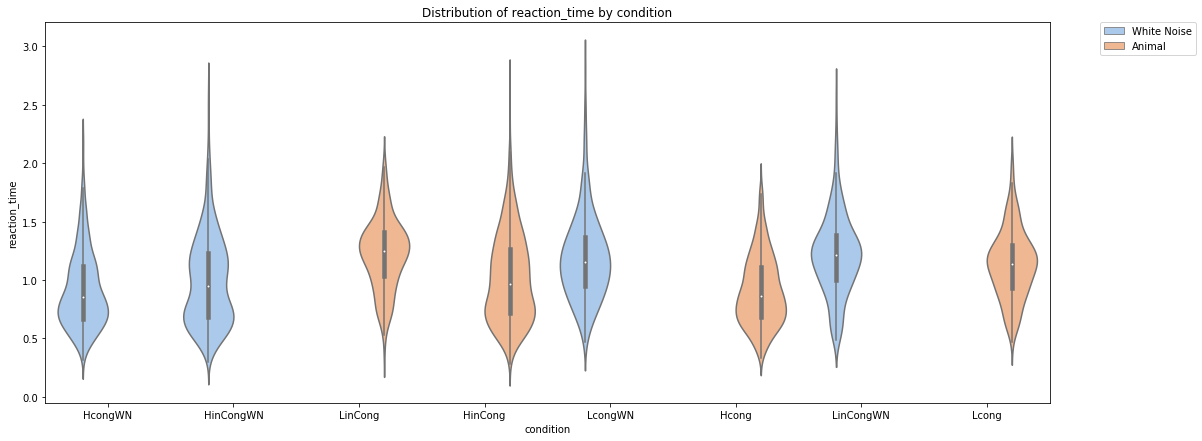

In [24]:
rtViolin = ah.violin(df = MSD, x = 'condition', y= 'reaction_time', z = 'sound_type', custom_scheme = 'pastel')

In [23]:
my_valList = ['first_fixation']
my_idList = ['trial', 'participant', 'condition']
firstFixationsG = ah.stacked_bar_graph(df = MSD,id_vars_list = my_idList, value_vars_list = my_valList, var_name_str = 'variable', value_name_str = 'value', x = 'condition', y = 'first_fixation', z = 'condition', output_directory = '/Users/sheaduarte/Desktop/School/PSC290python/final/duarte/reports/figures/', custom_scheme = 'pastel')

ValueError: sum(first_fixation) encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

Subset dataframes for plotting

In [7]:
#calculate proportion of first fixations to each location
MSD_firstfixDF = MSD[['trial','participant','fixation1','fixation2','fixation3','condition','reaction time','latency','fix dur1','fix dur2','fix dur3','first_fix_dwell','sound_type', 'first_fixation']]

In [8]:
MSD_firstfixDFCounts = MSD_firstfixDF.groupby(['first_fixation','condition']).count()
MSD_firstfixDFCounts = MSD_firstfixDFCounts.unstack()                                                
MSD_firstfixDFCounts 

trial                                                  \
condition      Hcong HcongWN HinCong HinCongWN Lcong LcongWN LinCong   
first_fixation                                                         
distIA           273     260     410       388   166     159     196   
fixationIA         7       5      10         8     1       2       6   
targetIA         773     798     626       648    96      98      57   

                         participant          ... first_fix_dwell            \
condition      LinCongWN       Hcong HcongWN  ...         LinCong LinCongWN   
first_fixation                                ...                             
distIA               200         273     260  ...             196       200   
fixationIA             2           7       5  ...               6         2   
targetIA              63         773     798  ...              57        63   

               sound_type                                                  \
condition           Hcong HcongWN HinCong HinCongWN Lcong LcongWN LinCong   
first_fixation                                                              
distIA                273     260     410       388   166     159     196   
fixationIA              7       5      10         8     1       2       6   
targetIA              773     798     626       648    96      98      57   

                          
condition      LinCongWN  
first_fixation            
distIA               200  
fixationIA             2  
targetIA              63  

[3 rows x 96 columns]

In [9]:
cond_list = ['Hcong', 'HcongWN','HinCong', 'HinCongWN','Lcong', 'LcongWN','LinCong', 'LinCongWN']

fixation_proportion_df = ah.FirstFixProportions(MSD_firstfixDFCounts, condition_list = cond_list)
fixation_proportion_df

,condition,distractor,target
0,Hcong,0.260994,0.739006
1,HcongWN,0.245747,0.754253
2,HinCong,0.395753,0.604247
3,HinCongWN,0.374517,0.625483
4,Lcong,0.633588,0.366412
5,LcongWN,0.618677,0.381323
6,LinCong,0.774704,0.225296
7,LinCongWN,0.760456,0.239544


In [10]:
#can be made more general?
def FirstFixProportions(countDF):
    cond_list = ['Hcong', 'HcongWN','HinCong', 'HinCongWN','Lcong', 'LcongWN','LinCong', 'LinCongWN']
    result = pd.DataFrame()
    for cond in cond_list:
        target = (countDF[('trial', cond)]['targetIA'])/((countDF[('trial',cond)]['distIA'])+
                                                          (countDF[('trial', cond)]['targetIA']))
        distractor = (countDF[('trial', cond)]['distIA'])/((countDF[('trial', cond)]['distIA'])+
                                                            (countDF[('trial', cond)]['targetIA']))
        PropDict = {'condition':cond,'target': target,'distractor':distractor}
        result = result.append(PropDict, ignore_index =True)
    return result

def FirstFixProportions(countDF, conditions, trialVar = 'trial', IA_1, IA_2 (or * type of thing here)):
    cond_list = ['Hcong', 'HcongWN','HinCong', 'HinCongWN','Lcong', 'LcongWN','LinCong', 'LinCongWN']
    result = pd.DataFrame()
    for cond in cond_list:
        target = (countDF[('trial', cond)]['targetIA'])/((countDF[('trial',cond)]['distIA'])+
                                                          (countDF[('trial', cond)]['targetIA']))
        distractor = (countDF[('trial', cond)]['distIA'])/((countDF[('trial', cond)]['distIA'])+
                                                            (countDF[('trial', cond)]['targetIA']))
        PropDict = {'condition':cond,'target': target,'distractor':distractor}
        result = result.append(PropDict, ignore_index =True)
    return result

FirstFix_DF = FirstFixProportions(MSD_firstfixDFCounts)
FirstFix_DF['sound_type'] = (FirstFix_DF['condition'] == 'Hcong') | (FirstFix_DF['condition'] == 'HinCong')|(FirstFix_DF['condition'] == 'Lcong') | (FirstFix_DF['condition'] == 'LinCong')
FirstFix_DF['sound_type'] = FirstFix_DF['sound_type'].astype(int)
FirstFix_DF.sound_type = FirstFix_DF.sound_type.replace({1: 'Animal', 0: 'White Noise'})
FirstFix_DF

SyntaxError: invalid syntax (<ipython-input-10-7c1d50332110>, line 14)

In [8]:
FFtargetGdata = MSD_firstfixDF[MSD_firstfixDF['first fixation'] == 'targetIA']
FFdistGdata = MSD_firstfixDF[MSD_firstfixDF['first fixation'] == 'distIA']

Fun Palettes (based on UCD secondary colors)

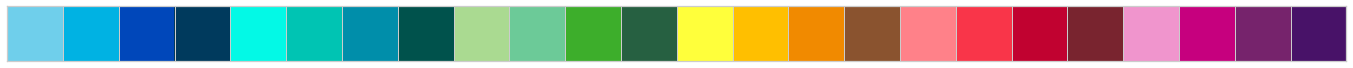

In [46]:
ucdSecond = ["#6FCFEB", "#00B2E3", "#0047BA", "#003A5D", "#03F9E6", "#00C4B3", "#008EAA", "#00524C",
             "#AADA91", "#6CCA98", "#3DAE2B", "#266041", "#FFFF3B", "#FFBF00", "#F18A00", "#8A532F",
             "#FF8189", "#F93549", "#C10230", "#79242F", "#F095CD", "#C6007E", "#76236C", "#481268"]
subPal = [ucdSecond[0], ucdSecond[3], ucdSecond[16], ucdSecond[18]]
subPaleye = [ucdSecond[8], ucdSecond[7],ucdSecond[16], ucdSecond[18]]
subPal8 = [ucdSecond[0], ucdSecond[3], ucdSecond[8], ucdSecond[7],
          ucdSecond[13], ucdSecond[14], ucdSecond[16], ucdSecond[18]]
subPal4 = [ucdSecond[7], ucdSecond[8]]

subPal10 = [ucdSecond[2], ucdSecond[6], ucdSecond[7], ucdSecond[10],
          ucdSecond[14], ucdSecond[17], ucdSecond[21], ucdSecond[22]]
sns.palplot(sns.color_palette(ucdSecond))

# Accuracy

In [31]:
def SjAcc(df):
    acc = (df['corrCheck'].value_counts()[1])/((df['corrCheck'].value_counts()[0])+
                                                       (df['corrCheck'].value_counts()[1]))
    print(acc)0

#get accuracy for each participant
conditionsA = MSDall.condition.unique()
conditions = conditionsA.tolist()
condAcc = MSDall.groupby('condition').apply(SjAcc)
Accuracy = [0.983224603914259,0.9833641404805915,0.9667590027700831,0.9721189591078067,0.9887218045112782,
            0.9773584905660377,0.9773584905660377,0.977859778597786]
AccData = {'Condition':conditions, 'Accuracy':Accuracy}
AccData = pd.DataFrame(AccData)
AccData['sound_type'] = (AccData['Condition'] == 'Hcong') | (AccData['Condition'] == 'HinCong')|(AccData['Condition'] == 'Lcong') | (AccData['Condition'] == 'LinCong')
AccData['sound_type'] = AccData['sound_type'].astype(int)
AccData.sound_type = AccData.sound_type.replace({1: 'Animal', 0: 'White Noise'})
AccData['sound_loc1'] = (AccData['Condition'] == 'Hcong') | (AccData['Condition'] == 'HcongWN')
AccData['sound_loc1'] = AccData['sound_loc1'].astype(int)
AccData.sound_loc1 = AccData.sound_loc1.replace({1: 'Duck1', 0: 'Frog1'})
AccData['sound_loc2'] = (AccData['Condition'] == 'Lcong') | (AccData['Condition'] == 'LcongWN')
AccData['sound_loc2'] = AccData['sound_loc2'].astype(int)
AccData.sound_loc2 = AccData.sound_loc2.replace({1: 'Frog2', 0: 'Duck2'})
AccData['sound_loc'] = AccData['sound_loc1']
AccData.loc[[4,5,6,7], 'sound_loc'] = AccData['sound_loc2']
AccData

0.983224603914259
0.9833641404805915
0.9667590027700831
0.9721189591078067
0.9887218045112782
0.9773584905660377
0.9773584905660377
0.977859778597786


,Condition,Accuracy,sound_type,sound_loc1,sound_loc2,sound_loc
0,Hcong,0.983225,Animal,Duck1,Duck2,Duck1
1,HcongWN,0.983364,White Noise,Duck1,Duck2,Duck1
2,HinCong,0.966759,Animal,Frog1,Duck2,Frog1
3,HinCongWN,0.972119,White Noise,Frog1,Duck2,Frog1
4,Lcong,0.988722,Animal,Frog1,Frog2,Frog2
5,LcongWN,0.977358,White Noise,Frog1,Frog2,Frog2
6,LinCong,0.977358,Animal,Frog1,Duck2,Duck2
7,LinCongWN,0.977860,White Noise,Frog1,Duck2,Duck2


Text(0.5, 0.98, 'Accuracy by Condition')

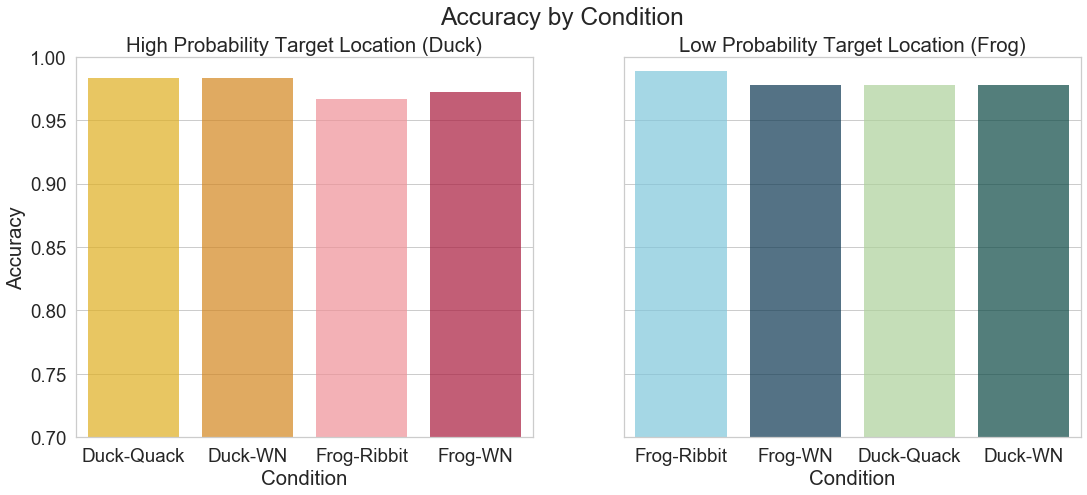

In [41]:
#accuracy plot
sns.set(style="whitegrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
plt.rcParams['figure.figsize'] = (18, 7)
ax1 = sns.barplot(x="Condition", y="Accuracy", data=AccData,
                  palette = subPal8[4:],
                  order = ['Hcong','HcongWN', 'HinCong','HinCongWN'],
                  alpha=.7, linewidth=0, ax=axs[0])
ax1.set(title = "High Probability Target Location (Duck)")
ax1.set(ylim = (.7, 1.0))
ax1.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
ax2 = sns.barplot(x="Condition", y="Accuracy", data=AccData,
                  palette = subPal8,
                  order = ['Lcong','LcongWN', 'LinCong','LinCongWN'],
                  alpha=.7, linewidth=0, ax=axs[1])
ax2.set(title = "Low Probability Target Location (Frog)")
ax2.set(ylim = (.7, 1.0), ylabel = '')
ax2.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
ax2.set_yticklabels('')
fig.suptitle("Accuracy by Condition")

Text(0.5, 0.98, 'Accuracy by Condition')

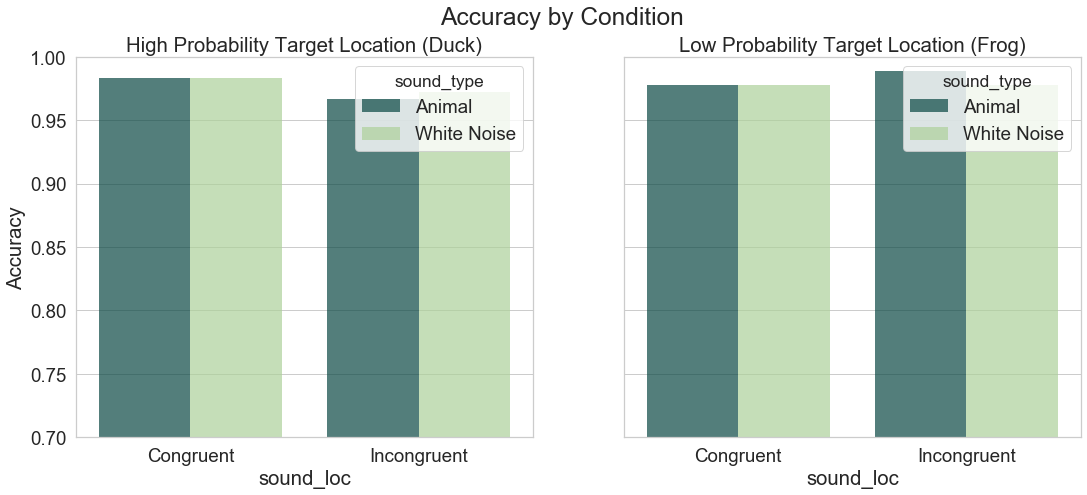

In [47]:
#accuracy plot
sns.set(style="whitegrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
plt.rcParams['figure.figsize'] = (18, 7)
ax1 = sns.barplot(x="sound_loc", y="Accuracy",hue = 'sound_type', data=AccData, 
                  palette = subPal4,
                  order = ['Duck1', 'Frog1'],
                  alpha=.7, linewidth=0, ax=axs[0])
ax1.set(title = "High Probability Target Location (Duck)")
ax1.set(ylim = (.7, 1.0))
ax1.set_xticklabels(['Congruent', 'Incongruent'])
ax2 = sns.barplot(x="sound_loc", y="Accuracy", hue = 'sound_type', data=AccData, 
                  palette = subPal4,
                  order = ['Duck2', 'Frog2'],
                  alpha=.7, linewidth=0, ax=axs[1])
ax2.set(title = "Low Probability Target Location (Frog)")
ax2.set(ylim = (.7, 1.0), ylabel = '')
ax2.set_xticklabels(['Congruent' ,'Incongruent'])
ax2.set_yticklabels('')
fig.suptitle("Accuracy by Condition")

In [ ]:
#reaction time plot (overall, not subset by fixation)
sns.set(style="darkgrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
plt.rcParams['figure.figsize'] = (18, 7)
ax3 = sns.barplot(x="condition", y="reaction time", 
            data=MSD,
            palette=subPal,alpha=.7,
            order=['Hcong','HcongWN','HinCong','HinCongWN'],
                  ax=axs[0],
                capsize = 0.05)
ax3.set(xlabel='condition', ylabel=[], title = "Duck Target (High Probability)", ylim=(0.7, 1.3))
ax3.set_title("Duck Target (High Probability)")
ax3.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
ax3.set_xlabel('Condition')
ax3.set_ylabel('Mean Reaction Time (s)')
ax4 = sns.barplot(x="condition", y="reaction time", 
            palette=subPal,alpha=.7,
            data=MSD,
            color='g',
            order=['Lcong','LcongWN','LinCong','LinCongWN'],
                  ax=axs[1],
                capsize = 0.05)
ax4.set(xlabel='condition', ylabel= '', title = "Frog Target (Low Probability)", ylim=(0.7, 1.3))
ax4.set_xlabel('Condition')
ax4.set_title("Frog Target (Low Probability)")
ax4.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
ax4.set_yticklabels('')
fig.suptitle("Mean Reaction Time by Condition")
plt.show()

In [ ]:
#distributions of reaction times by condition
fig, axs = plt.subplots(ncols=2)
sns.set(style="darkgrid", font_scale = 1.7)
plt.rcParams['figure.figsize'] = (18, 7)
ax2 = sns.violinplot(x="condition", y="reaction time", 
                    data=MSD,
                    palette=subPal,
                     alpha = 0.8,
                    order=["Hcong", "HcongWN", "HinCong", "HinCongWN"],
                    ax=axs[0])
ax2.set(xlabel='Condition', ylabel='Reaction Time (s)', title = 'Duck Target (High Probability)', ylim=(0, 3.1))
ax2.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
ax4 = sns.violinplot(x="condition", 
                    y="reaction time",
                    data=MSD,
                     palette=subPal,
                     alpha = 0.8,
                    order=["Lcong", "LcongWN", "LinCong", "LinCongWN"],
                    ax=axs[1])
ax4.set(xlabel='Condition', ylabel='', title = 'Frog Target (Low Probability)', ylim=(0, 3.1))
ax4.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
fig.suptitle("Reaction Time Distributions by Condition")
plt.show()

In [ ]:
#RT by participant
sns.set(style="darkgrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
plt.rcParams['figure.figsize'] = (18, 14)
ax7 = sns.pointplot(x="condition", y="reaction time", hue = "participant",
            data=MSD,
            palette = subPal10,
            order=['Hcong','HcongWN','HinCong','HinCongWN'],
                  ax=axs[0],
                capsize = 0.05)
ax7.legend_.remove()
ax7.set(xlabel='Condition', ylabel='Mean Reaction Time (s)', title = "Duck Target (High Probability)", ylim=(0.5, 2.1))
ax7.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
ax8 = sns.pointplot(x="condition", y="reaction time", hue = "participant",
                    palette = subPal10,
            data=MSD,
            order=['Lcong','LcongWN','LinCong','LinCongWN'],
                  ax=axs[1],
                capsize = 0.05)
plt.rcParams.update({'font.size': 14})
ax8.set(xlabel='Condition', ylabel='', title = "Frog Target (Low Probability)", ylim=(0.5, 2.1))
ax8.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
plt.legend(title = "participant", bbox_to_anchor=(1, 1), prop={'size': 16})
fig.suptitle("Mean Reaction Time by Participant", fontsize = 24)
plt.show()

In [ ]:
#RT by participant first fix on target
sns.set(style="darkgrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
plt.rcParams['figure.figsize'] = (18, 14)
ax7 = sns.pointplot(x="condition", y="reaction time", hue = "participant",
            data=FFtargetGdata,
            palette = subPal10,
            order=['Hcong','HcongWN','HinCong','HinCongWN'],
                  ax=axs[0],
                capsize = 0.05)
ax7.legend_.remove()
ax7.set(xlabel='Condition', ylabel='Mean Reaction Time (s)', title = "Duck Target (High Probability)", ylim=(0.5, 2))
ax7.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
ax8 = sns.pointplot(x="condition", y="reaction time", hue = "participant",
                    palette = subPal10,
            data=FFtargetGdata,
            order=['Lcong','LcongWN','LinCong','LinCongWN'],
                  ax=axs[1],
                capsize = 0.05)
plt.rcParams.update({'font.size': 14})
ax8.set(xlabel='Condition', ylabel='', title = "Frog Target (Low Probability)", ylim=(0.5, 2))
ax8.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
plt.legend(title = "participant", bbox_to_anchor=(1, 1), prop={'size': 16})
fig.suptitle("Mean Reaction Time by Participant: First Fixation on Target", fontsize = 24)
plt.show()

In [ ]:
#RT by participant first fix on distractor
sns.set(style="darkgrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
plt.rcParams['figure.figsize'] = (18, 14)
ax7 = sns.pointplot(x="condition", y="reaction time", hue = "participant",
            data=FFdistGdata,
            palette = subPal10,
            order=['Hcong','HcongWN','HinCong','HinCongWN'],
                  ax=axs[0],
                capsize = 0.05)
ax7.legend_.remove()
ax7.set(xlabel='Condition', ylabel='Mean Reaction Time (s)', title = "Duck Target (High Probability)", ylim=(0.5, 2))
ax7.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
ax8 = sns.pointplot(x="condition", y="reaction time", hue = "participant",
                    palette = subPal10,
            data=FFdistGdata,
            order=['Lcong','LcongWN','LinCong','LinCongWN'],
                  ax=axs[1],
                capsize = 0.05)
plt.rcParams.update({'font.size': 14})
ax8.set(xlabel='Condition', ylabel='', title = "Frog Target (Low Probability)", ylim=(0.5, 2))
ax8.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
plt.legend(title = "participant", bbox_to_anchor=(1, 1), prop={'size': 16})
fig.suptitle("Mean Reaction Time by Participant: First Fixation on Distractor", fontsize = 24)
plt.show()

In [ ]:
#first saccade projections for high probability animal conditions
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 7)
bars1a = FirstFix_DF['target']
bars1a.tolist()
bars1 = [bars1a[0],bars1a[1], bars1a[2],bars1a[3]]
bars3a = FirstFix_DF['distractor']
bars3a.tolist()
bars3 = [bars3a[0],bars3a[1], bars3a[2],bars3a[3]]
names = ['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN']
barWidth = .8 
p1 = plt.bar(FirstFix_DF.condition[0:4], bars1, color="#266041", edgecolor='white', alpha = .75, width=barWidth, )
p3 = plt.bar(FirstFix_DF.condition[0:4], bars3, bottom=bars1, color="#C10230", alpha = .75, edgecolor='white', width=barWidth) 
plt.xticks(FirstFix_DF.condition[0:4], names, fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('Proportion of Saccades', fontsize = 20)
plt.xlabel('Condition', fontsize = 20)
plt.title('Duck Target (High Probability)', fontsize = 24)
plt.show()

In [ ]:
#first saccade projections for high probability animal conditions
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 7)
bars1a = FirstFix_DF['target']
bars1a.tolist()
bars4 = [bars1a[4],bars1a[5], bars1a[6],bars1a[7]]
bars3a = FirstFix_DF['distractor']
bars3a.tolist()
bars5 = [bars3a[4],bars3a[5], bars3a[6],bars3a[7]]
names2 = ['Frog-Ribbit', 'Frog-WN', 'Quack-Duck', 'Duck-WN']
barWidth = .8 
# Create teal bars
p1 = plt.bar(FirstFix_DF.condition[4:], bars4, color="#266041", edgecolor='white', alpha = .75, width=barWidth, )
p3 = plt.bar(FirstFix_DF.condition[4:], bars5, bottom=bars4, color="#C10230", alpha = .75, edgecolor='white', width=barWidth) 
plt.xticks(FirstFix_DF.condition[4:], names2, fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('')
plt.xlabel('Condition', fontsize = 20)
plt.title('Frog Target (Low Probability)', fontsize=24)
plt.legend((p1[0], p3[0]), ('target', 'distractor'), 
           bbox_to_anchor=(1, 1), prop={'size': 20})
plt.show()

In [ ]:
#Mean reaction time when first fixation is the target
sns.set(style="darkgrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
plt.rcParams['figure.figsize'] = (18, 7)
ax5 = sns.barplot(x="condition", y="reaction time", 
            data=FFtargetGdata,
            palette=subPal,alpha=.7,
            order=['Hcong','HcongWN','HinCong','HinCongWN'],
                  ax=axs[0],
                capsize = 0.05)
ax5.set(xlabel='condition', ylabel=[], title = "Duck Target (High Probability)", ylim=(0.7, 1.3))
ax5.set_title("Duck Target (High Probability)")
ax5.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
ax5.set_xlabel('Condition')
ax5.set_ylabel('Mean Reaction Time (s)')
ax6 = sns.barplot(x="condition", y="reaction time", 
            palette=subPal,alpha=.7,
            data=FFtargetGdata,
            color='g',
            order=['Lcong','LcongWN','LinCong','LinCongWN'],
                  ax=axs[1],
                capsize = 0.05)
ax6.set(xlabel='condition', ylabel= '', title = "Frog Target (Low Probability)", ylim=(0.7, 1.3))
ax6.set_xlabel('Condition')
ax6.set_title("Frog Target (Low Probability)")
ax6.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
ax6.set_yticklabels('')
fig.suptitle("Mean Reaction Time by Condition: First Fixation on Target")
plt.show()

In [ ]:
#Mean reaction time when first fixation is the target
#create columns for sounds vs white noise, make catplot
sns.set(style="darkgrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
plt.rcParams['figure.figsize'] = (18, 7)
ax5 = sns.barplot(x="condition", y="reaction time", 
            data=FFtargetGdata,
            palette=subPal,alpha=.7,
            order=['Hcong','HcongWN','HinCong','HinCongWN'],
                  ax=axs[0],
                capsize = 0.05)
ax5.set(xlabel='condition', ylabel=[], title = "Duck Target (High Probability)", ylim=(0.7, 1.3))
ax5.set_title("Duck Target (High Probability)")
ax5.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
ax5.set_xlabel('Condition')
ax5.set_ylabel('Mean Reaction Time (s)')
ax6 = sns.barplot(x="condition", y="reaction time", 
            palette=subPal,alpha=.7,
            data=FFtargetGdata,
            color='g',
            order=['Lcong','LcongWN','LinCong','LinCongWN'],
                  ax=axs[1],
                capsize = 0.05)
ax6.set(xlabel='condition', ylabel= '', title = "Frog Target (Low Probability)", ylim=(0.7, 1.3))
ax6.set_xlabel('Condition')
ax6.set_title("Frog Target (Low Probability)")
ax6.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
ax6.set_yticklabels('')
fig.suptitle("Mean Reaction Time by Condition: First Fixation on Target")
plt.show()

In [ ]:
#Mean reaction time when first fixation is the distractor
sns.set(style="darkgrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
plt.rcParams['figure.figsize'] = (18, 7)
ax5 = sns.barplot(x="condition", y="reaction time", 
            data=FFdistGdata,
            palette=subPal,alpha=.7,
            order=['Hcong','HcongWN','HinCong','HinCongWN'],
                  ax=axs[0],
                capsize = 0.05)
ax5.set(xlabel='condition', ylabel=[], title = "Duck Target (High Probability)", ylim=(0.8, 1.5))
ax5.set_title("Duck Target (High Probability)")
ax5.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
ax5.set_xlabel('Condition')
ax5.set_ylabel('Mean Reaction Time (s)')
ax6 = sns.barplot(x="condition", y="reaction time", 
            palette=subPal,alpha=.7,
            data=FFdistGdata,
            color='g',
            order=['Lcong','LcongWN','LinCong','LinCongWN'],
                  ax=axs[1],
                capsize = 0.05)
ax6.set(xlabel='condition', ylabel= '', title = "Frog Target (Low Probability)", ylim=(0.8, 1.5))
ax6.set_xlabel('Condition')
ax6.set_title("Frog Target (Low Probability)")
ax6.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
ax6.set_yticklabels('')
fig.suptitle("Mean Reaction Time by Condition: First Fixation on Distractor")
plt.show()

In [ ]:
#mean saccade latency by condition
sns.set(style="darkgrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
lat = sns.barplot(x='condition',
                  y='latency', 
                  data= MSD,
                  capsize = .06,
                  order = ['Hcong', 'HcongWN', 'HinCong', 'HinCongWN'],
                 palette = subPal,alpha=.7,
                 ax = axs[0])
plt.rcParams.update({'font.size': 14})
lat.set(xlabel='Condition', ylabel='Latency (ms)', 
       title = "Duck Target (High Probability)",
       ylim=(600, 800))
lat.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
lat2 = sns.barplot(x='condition',
                  y='latency', 
                  data= MSD,
                  capsize = .06,
                  order = ['Lcong', 'LcongWN', 'LinCong', 'LinCongWN'],
                 palette = subPal, alpha=.7,
                  ax = axs[1])
plt.rcParams.update({'font.size': 14})
lat2.set(xlabel='Condition', ylabel='', 
       title = "Frog Target (Low Probability)",
       ylim=(600, 800))
lat2.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
fig.suptitle("Mean Saccade Latency by Condition", fontsize = 24)
plt.show()

In [ ]:
#mean dwell on first fixation 
sns.set(style="darkgrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
lat = sns.barplot(x='condition',
                  y='first fix dwell', 
                  data= MSD,
                  capsize = .06,
                  order = ['Hcong', 'HcongWN', 'HinCong', 'HinCongWN'],
                 palette = subPal,alpha=.7,
                 ax = axs[0])
plt.rcParams.update({'font.size': 14})
lat.set(xlabel='Condition', ylabel='Dwell Time (ms)', 
       title = "Duck Target (High Probability)",
       ylim=(200, 400))
lat.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
lat2 = sns.barplot(x='condition',
                  y='first fix dwell', 
                  data= MSD,
                  capsize = .06,
                  order = ['Lcong', 'LcongWN', 'LinCong', 'LinCongWN'],
                 palette = subPal, alpha=.7,
                  ax = axs[1])
plt.rcParams.update({'font.size': 14})
lat2.set(xlabel='Condition', ylabel='', 
       title = "Frog Target (Low Probability)",
       ylim=(200, 400))
lat2.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
fig.suptitle("Mean Dwell Time on First Fixation", fontsize = 24)
plt.show()

In [ ]:
sns.set(style="darkgrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
lat = sns.barplot(x='condition',
                  y='first fix dwell', 
                  data= FFdistGdata,
                  capsize = .06,
                  order = ['Hcong', 'HcongWN', 'HinCong', 'HinCongWN'],
                 palette = subPal,alpha=.7,
                 ax = axs[0])
plt.rcParams.update({'font.size': 14})
lat.set(xlabel='Condition', ylabel='Dwell Time (ms)', 
       title = "Duck Target (High Probability)",
       ylim=(200, 400))
lat.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
lat2 = sns.barplot(x='condition',
                  y='first fix dwell', 
                  data= FFdistGdata,
                  capsize = .06,
                  order = ['Lcong', 'LcongWN', 'LinCong', 'LinCongWN'],
                 palette = subPal, alpha=.7,
                  ax = axs[1])
plt.rcParams.update({'font.size': 14})
lat2.set(xlabel='Condition', ylabel='', 
       title = "Frog Target (Low Probability)",
       ylim=(200, 400))
lat2.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
fig.suptitle("Mean Dwell Time on First Fixation: First Fixation on Distractor", fontsize = 24)
plt.show()

In [ ]:
sns.set(style="darkgrid", font_scale = 1.7)
fig, axs = plt.subplots(ncols=2)
lat = sns.barplot(x='condition',
                  y='first fix dwell', 
                  data= FFtargetGdata,
                  capsize = .06,
                  order = ['Hcong', 'HcongWN', 'HinCong', 'HinCongWN'],
                 palette = subPal,alpha=.7,
                 ax = axs[0])
plt.rcParams.update({'font.size': 14})
lat.set(xlabel='Condition', ylabel='Dwell Time (ms)', 
       title = "Duck Target (High Probability)",
       ylim=(200, 400))
lat.set_xticklabels(['Duck-Quack', 'Duck-WN', 'Frog-Ribbit', 'Frog-WN'])
lat2 = sns.barplot(x='condition',
                  y='first fix dwell', 
                  data= FFtargetGdata,
                  capsize = .06,
                  order = ['Lcong', 'LcongWN', 'LinCong', 'LinCongWN'],
                 palette = subPal, alpha=.7,
                  ax = axs[1])
plt.rcParams.update({'font.size': 14})
lat2.set(xlabel='Condition', ylabel='', 
       title = "Frog Target (Low Probability)",
       ylim=(200, 400))
lat2.set_xticklabels(['Frog-Ribbit', 'Frog-WN', 'Duck-Quack', 'Duck-WN'])
fig.suptitle("Mean Dwell Time on First Fixation: First Fixation on Target", fontsize = 24)
plt.show()

In [ ]:
#make a function that allows you to input (df, xaxis, yaxis, limits, suptitle) for RT, maybe for participant